In [154]:
from scipy.stats import poisson
import numpy as np

In [183]:
s = 500
tot_num_slots = 10
radius_perc = 0.7
grb_area_1 = 1
grb_area_2 = 2

inversemM = grb_area_1*radius_perc**2 + grb_area_2* (1-radius_perc**2)
inversemm = 1

lb = np.linspace(1, 650, dtype='float64')
arrival_in_micro_cell = np.linspace(0, 0.50, 16, dtype='float64')
num_reserved_slots = np.linspace(0, 8, 9, dtype='float64')


In [184]:
data = np.empty( (len(num_reserved_slots),len(arrival_in_micro_cell),len(lb))) 

for nrsn in range(len(num_reserved_slots)):
    sm = s*num_reserved_slots[nrsn]/tot_num_slots
    sM = s - sm
    for amcn in range(len(arrival_in_micro_cell)):
        for l in range(len(lb)):
#             Macro cell
            lbMi = lb[l]*(1-arrival_in_micro_cell[amcn])
            pMi = lbMi * inversemM
            p1 = poisson.pmf(sM, pMi)
            p2 = poisson.cdf(sM, pMi)
            psMi = p1/p2
            tMc = lbMi*(1-psMi)
            
            lbmi = lb[l]*arrival_in_micro_cell[amcn]
            pmi = lbmi * inversemm
            psmi = poisson.pmf(sm, pmi)/poisson.cdf(sm, pmi)
            tmc = lbmi*(1-psmi)
            
            data[nrsn][amcn][l] = tMc + tmc
            
    

In [185]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

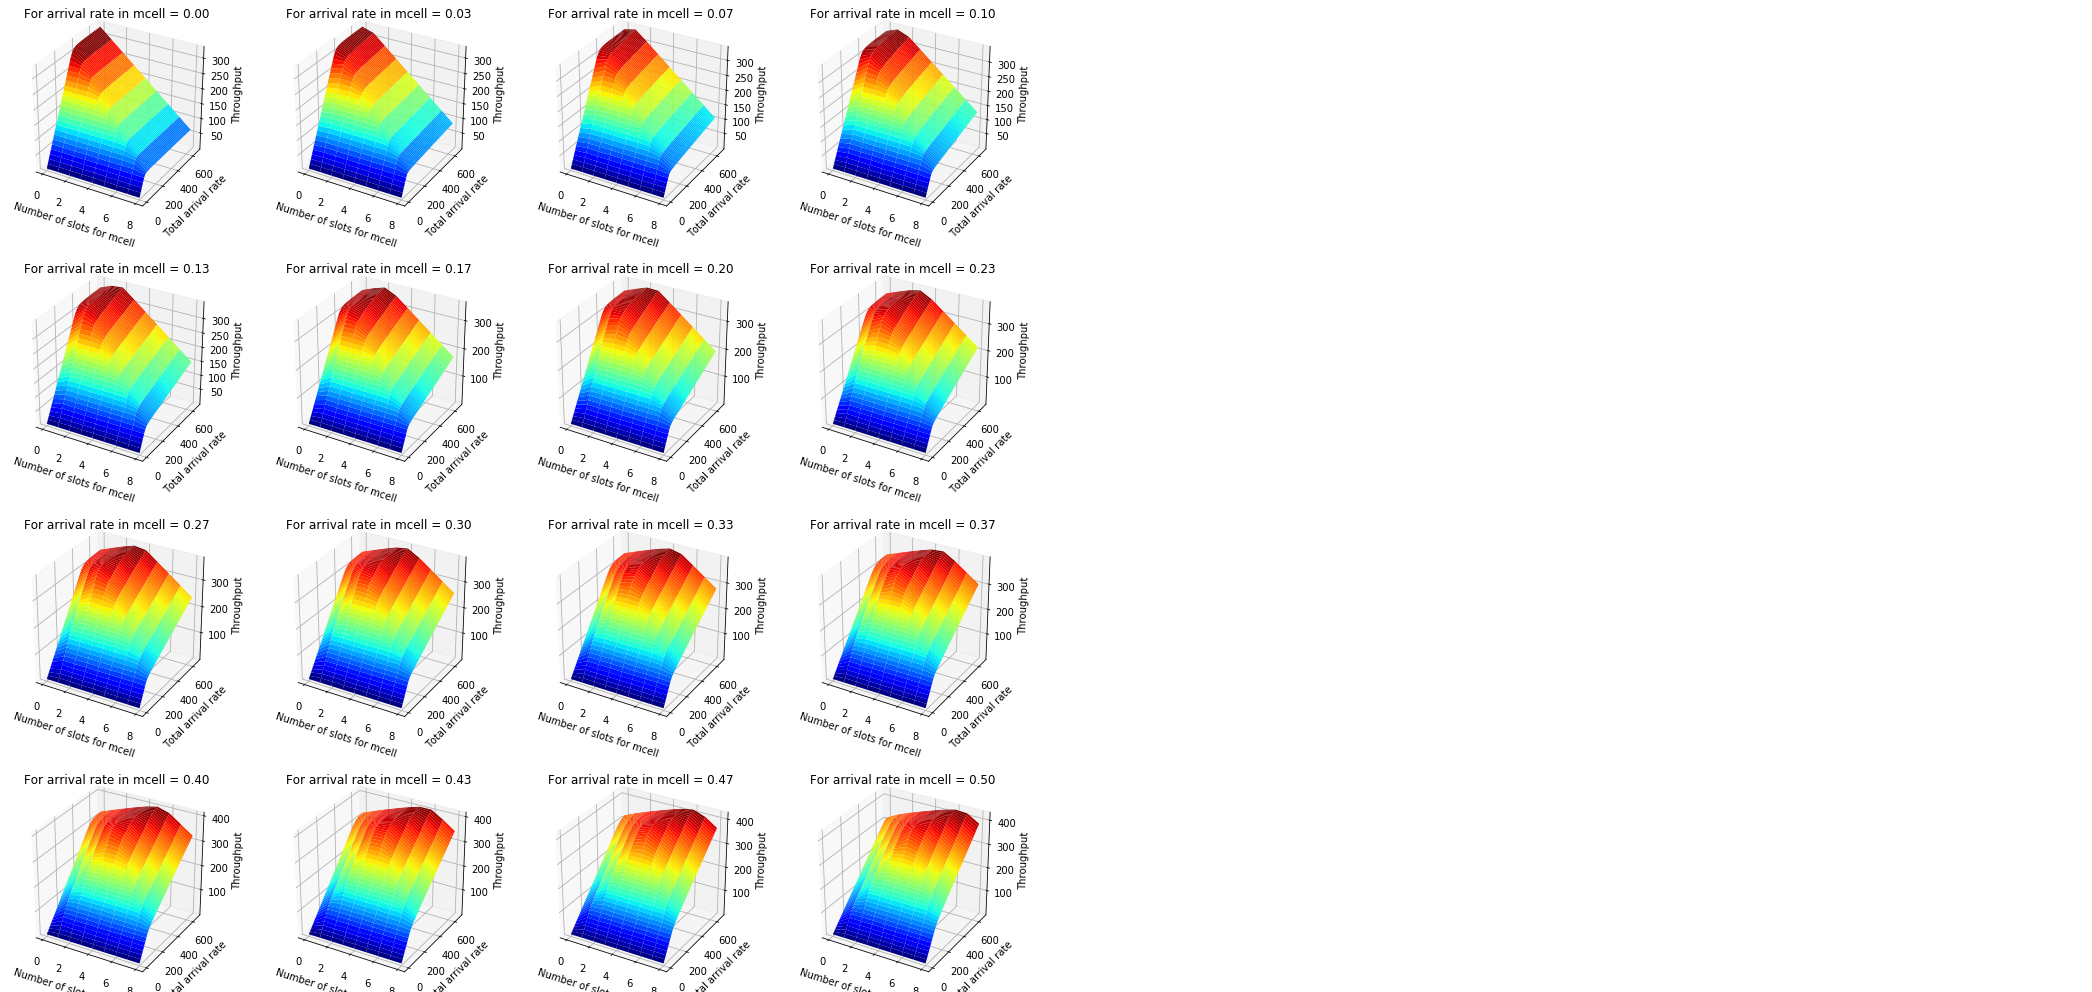

In [213]:
x, y = np.meshgrid(lb, num_reserved_slots)
# ax = plt.axes(projection='3d')
fig = plt.figure(figsize=(18, 18),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, 17):
    ax = fig.add_subplot(4, 4, i, projection='3d')
    ax.plot_surface(y, x, data[:, i-1, :], cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
    ax.set_title('For arrival rate in mcell = '+'%.2f' % arrival_in_micro_cell[i-1])
    ax.set_xlabel('Number of slots for mcell')
    ax.set_ylabel('Total arrival rate')
    ax.set_zlabel('Throughput')

fig.savefig('fig0.png')

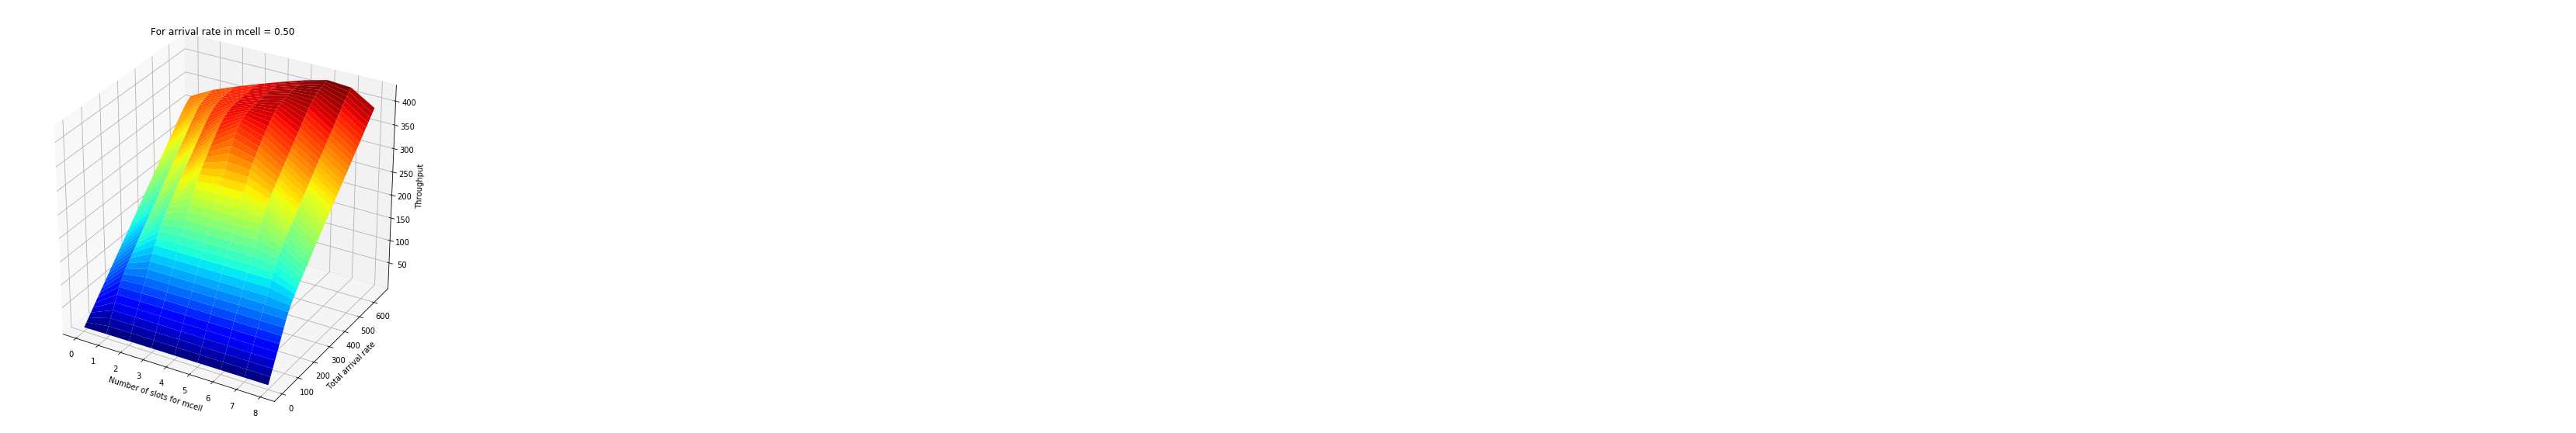

In [215]:
x, y = np.meshgrid(lb, num_reserved_slots)
# ax = plt.axes(projection='3d')
fig = plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 17):
    ax = plt.axes(projection='3d')
    ax.plot_surface(y, x, data[:, i-1, :], cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
    ax.set_title('For arrival rate in mcell = '+'%.2f' % arrival_in_micro_cell[i-1])
    ax.set_xlabel('Number of slots for mcell')
    ax.set_ylabel('Total arrival rate')
    ax.set_zlabel('Throughput')
    fig.savefig('fig'+ str(i)+'.png')
